# **DSCI 691: Project Implementation**
# Title: Wikipedia Toxic Comments Classification

## General Group / Submission Information

### Project group
- Group member 1
    - Name: Nikhil Muthuvenkatesh
    - Email: nm3297@drexel.edu
- Group member 2
    - Name: Seyi Oyesiku
    - Email: so536@drexel.edu
- Group member 3
    - Name: Connor Roth
    - Email: cxr25@drexel.edu
- Group member 4
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu

### Additional submission comments
- External support and stakeholders: NA
- Other (other): NA
- Large groups justification: NA

## Project Overview
### Project goals
The main goal of our project is to develop a model that can effectively detect and classify different types of toxic comments - these include threats, obscenity, insults, and identity-based hate. Specifically, we aim to achieve a higher F1/F-measure score than the best performing model from our research paper of interest. As a result, we hope to use the model to improve online conversation by reducing the prevalence of toxic comments that discourage open discussion and limit the exchange of different perspectives.


### NLP task description
This project's task is essentially an exercise in text-based classification, which has been a traditional NLP task since the early days of machine learning. Specifically, as mentioned above, the task is a multi-class classification exericse to correctly bucket Wikipedia comments into one of 6 "toxic" categories. We will certainly need to employ pre-processing of some sort (Word2Vec or GloVe) to create word embeddings for our models to use.


### Project data
The single [dataset](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data) we plan to leverage is a collection of of Wikipedia comments labeled by human raters for toxic behavior. The types of toxicity are:
- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

__Files__:

train.csv - the training set contains comments with their binary labels.

test.csv - the test set contains some comments.

sample_submission.csv - a sample submission file in the correct format.

test_labels.csv - labels for the test data.

### Neural methodology
For this project, we will experiment with different neural architectures and hyperparameters to find the best-performing model for our task.

Specifically, we will attempt to use a combination of the following four types of models:
1. Convolutional neural network (CNN)
2. Bidirectional long short-term memory (LSTM)
3. Bidirectional gated recurrent unit (GRU)
4. Google BERT AI

Our team's hope is to experiment with these models individually and as ensemble groupings to identify the best possible combinations. Also, we must note that the architecture (# of neurons, # of layers, etc.) will likely be experimented with versus the baseline model.

### Baselines
As mentioned above, the primary baseline we intend to compare to is that of the research paper we used in Section 2. Its best performing model was an ensemble of CNN ensemble, Bidirectional LSTM, and Bidirectional GRU. So, we must outperform the ["0.828 and
0.872 F1-score for toxic/non-toxic classification and toxicity
types prediction respectively"](https://ieeexplore.ieee.org/document/8614166) in order for this research to be considered successful.

### Evaluation
In our project, we will use F1-score as our primary performance metric for evaluating our neural models. This is because accuracy and area under the ROC curve (ROC AUC) can be biased or mask poor performance in cases where data is imbalanced, as is the case with our toxic comment classification task. F1-score is the harmonic mean of precision and recall, providing a reliable measure of the model's performance even with skewed data. By using F1-score, we can assess our models' ability to accurately identify toxic comments, which is critical for deploying a functional application that can help improve online conversation by effectively detecting and managing toxic content.

## Relevant Libraries / General Configuration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Nikhil File Path
# %cd "/content/drive/My Drive/DSCI_691/Project Implementation"

# Amira Change Directory Command #
%cd "/content/drive/My Drive/Project Implementation"

# Seyi Change Directory Command #
# %cd "/content/drive/MyDrive/Project Implementation"

# CXR Change Directory Command #
# %cd "/content/drive/My Drive/DSCI_691/Project Implementation"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1YLfeHvPldAiwpi8QnKgiHwSAugt6ZWXH/Project Implementation


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00


In [3]:
# Data import / processing
import pandas as pd
import re

# Analysis
import numpy as np

# Preprocessing - General
from keras.preprocessing import text
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

#Preprocessing - LSTM
from torchtext.vocab import GloVe

# Preprocessing - BERT
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Modeling - General
import torch
import torch.nn as nn
import tensorflow as tf

# Modeling - LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Modeling - BERT
from transformers import BertTokenizer
from transformers import BertModel
from transformers import AdamW, get_linear_schedule_with_warmup

# Model Evaluation
from sklearn.metrics import classification_report

## Import Training and Test Data

The dataset for this project is contained within a series of CSVs that have already been downloaded from [Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge).

Thus, the process will simply be to load these datasets using pandas' "read_csv" function.

In [4]:
#Create relative path and read using pandas
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
test_labels = pd.read_csv("./data/test_labels.csv")

In [5]:
# # ATTEMPT: reducing data
# np.random.seed(42)
# num_rows_to_remove = int(0.8 * len(train))
# rows_to_remove = np.random.choice(train.index, num_rows_to_remove, replace=False)
# reduced_train = train.drop(rows_to_remove)
# reduced_train = reduced_train.reset_index(drop=True)
# reduced_train.to_csv("./data/reduced_train.csv", index=False)
# train = reduced_train

In [6]:
#Examine head of training dataset
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Here, we see that there are 8 total columns:
- id: A unique identifier representing the individual comment
- comment_text: the body of the comment, which will serve as the data underlying the team's modeling efforts.
- toxic, severe_toxic, obscene, threat, insult, identity_hate: Labels representing the classification task. We will further explore these during the EDA portion of the project.

In [7]:
#Examine head of the test dataset
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Test only contains ID and comment_text. The correct labels are stored in "test_labels", which we will merge in now to get a complete picture of the dataframe.

In [8]:
test = test.merge(right = test_labels, on = "id", how = "inner")

In [9]:
#Examine head of merged test dataset
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


Notice that the first few rows all have -1 values. These represent items that are not scored as part of the task. So, we'll want to remove these and keep only the ones for which we have all labels.

In [10]:
cond_1 = test["toxic"] != -1
cond_2 = test["severe_toxic"] != -1
cond_3 = test["obscene"] != -1
cond_4 = test["threat"] != -1
cond_5 = test["insult"] != -1
cond_6 = test["identity_hate"] != -1

test = test[cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6].reset_index(drop=True)

In [11]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


Before we move on, though, let's now take a look at the number of instances in the training and test sets.

In [12]:
print("Number of comments in TRAIN: ", len(train))
print("Number of comments in TEST: ", len(test))

Number of comments in TRAIN:  159571
Number of comments in TEST:  63978


Training has a little over 150,000 comments. Test has roughly 64,000 comments after cleaning up for the comments that were not part of the competition scoring. Initially, it had close to 150,000 as well.

## Exploratory Data Analysis

### Review Training Comment Examples

Next, we will take a closer look at comments to better understand the kind of data we will be working with.

In [13]:
train["comment_text"][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [14]:
train["comment_text"][18]

"The Mitsurugi point made no sense - why not argue to include Hindi on Ryo Sakazaki's page to include more information?"

Here, we can see the context of the data. Specifically, these derive from users on Wikipedia posting comments related to edits / content.

Let's now filter down to some actual "toxic" comments to see what those look like. Specifically, we'll refrain from looking at some of the more "obscene" ones.

In [15]:
#Create "toxic" filter
train_toxic_filter = train[train["toxic"] == 1].reset_index()

train_toxic_filter["comment_text"][2]

"Bye! \n\nDon't look, come or think of comming back! Tosser."

In [16]:
train_toxic_filter["comment_text"][17]

"You should be fired, you're a moronic wimp who is too lazy to do research. It makes me sick that people like you exist in this world."

### Comment Length Descriptive Statistics

With some initial views of the comments out of the way, we will dig into the specifics of commments with some descriptive statistics on length.

In [17]:
#Grab comment lengths from training dataset
comment_lengths = train.comment_text.str.len()

#Analyze mean, median, standard deviation, min, and max values
print("Mean Comment Length: ", comment_lengths.mean())
print("Mean Comment Length: ", comment_lengths.median())
print("Standard Deviation of Comment Length: ", comment_lengths.std())
print("Min Comment Length: ", comment_lengths.min())
print("Max Comment Length: ", comment_lengths.max())

Mean Comment Length:  394.0732213246768
Mean Comment Length:  205.0
Standard Deviation of Comment Length:  590.7202819048919
Min Comment Length:  6
Max Comment Length:  5000


The main insights are as follows:
- Comments are, on average, just shy of 400 characters long.
- The distribution has a right tail, with some very large comments reaching up to 5000 max.
- Following on this, the distribution itself has a very large standard deviation - just shy of 600 characters.

Let's take a look at this graphically, though.

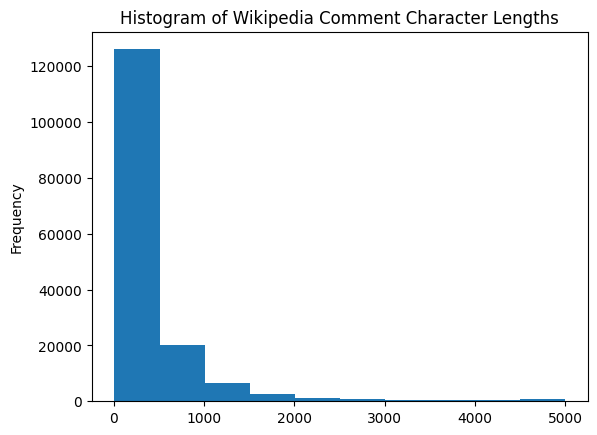

In [18]:
#Graph a histogram using the comment_lengths
comment_lengths.plot(kind = "hist",
                     title = "Histogram of Wikipedia Comment Character Lengths",
                     xlabel = "Comment Character Lengths");

### Exploration of Labels

Next, we'll take a look at the labels themselves to understand...
1. Descriptive statistics
2. Interaction between labels

In [19]:
# Create list of label columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create new label of "none" for better understanding of what the rest of the dataset looks like
train_new = train.copy()
train_new['none'] = 1-train_new[label_cols].max(axis=1)

# Append "none"
label_cols.append("none")

#Show descriptive statistics
train_new.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Sum mean values
print("Sum of all values: ", sum([train_new[x].mean() for x in train_new[label_cols]]))
print("Sum of 'toxic' and 'none': ", train_new["toxic"].mean() + train_new["none"].mean())

Sum of all values:  1.118273370474585
Sum of 'toxic' and 'none':  0.9941656065325153


A few important insights come out of this view:
- The labels overlap. That is, adding the mean values across all labels (including "none") will yield over 100%
- Toxic + none alone do NOT add to 100%. It's just under that value.

So, we will need to examine this overlap further to tease out what exactly is going on here.

In [21]:
pd.crosstab(train_new.toxic, train_new.none)

none,0,1
toxic,,
0,931,143346
1,15294,0


As mentioned earlier, there are 931 comments that are neither "toxic" nor "none". So, let's take a look at what exactly these are.

In [22]:
#Create conditions
condition1 = train_new["toxic"] == 0
condition2 = train_new["none"] == 0

#Apply conditions as masks
train_label_exploration = train_new[condition1 & condition2]

#Check mean values
train_label_exploration[label_cols].mean()

toxic            0.000000
severe_toxic     0.000000
obscene          0.561762
threat           0.031149
insult           0.572503
identity_hate    0.110634
none             0.000000
dtype: float64

Those that aren't "toxic" or "none" are a mix of "obscene", "threat", "insult", and "identity_hate". Again, note that these add up to more than 1, indicating overlap of these labels.

This is important, as it means that we need to treat thsi as a multi-label classification task when predicting for toxic comment labels. Further, it would behoove us to split the modeling effort into two distinct parts - one for toxic vs. non-toxic (binary classification) and one for types of toxic (multi-label classification).

### Searching for Nulls / Missing Values

Now, we will turn our attention to check for any null or NA values in the dataframe. Any of these could be problematic, so we must be thorough and examine the entirety of the dataframe for both Train and Test.

In [23]:
print("Any TRAIN Null Values?: ", train.isnull().values.any())
print("Any TRAIN NA Values?: ", train.isna().values.any())
print()
print("Any TEST Null Values?: ", test.isnull().values.any())
print("Any TEST NA Values?: ", test.isna().values.any())

Any TRAIN Null Values?:  False
Any TRAIN NA Values?:  False

Any TEST Null Values?:  False
Any TEST NA Values?:  False


Thankfully, this is not the case for either Train or Test, so we can proceed without the need to fill values / adjust the dataframes.

## Preprocessing

### General Preprocessing
First, we will create the necessary additional labels in the training and test datasets for Binary Classification.

In [24]:
def roll_up_labels(df):
  # Create list of label columns
  label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

  #Create new "toxic_rollup"
  df["toxic_rollup"] = df[label_cols].max(axis=1)

  return df

In [25]:
train = roll_up_labels(train)
test = roll_up_labels(test)

Next, we want to create a function that can more generally clean up some of the text and transform it into something useable.

In [26]:
def text_preprocessing(text):
    # Remove any characters that are not letters or punctuation marks
    cleaned_text = re.sub(r"[^a-zA-Z\s.,!?']", "", text)

    # Remove any extra whitespace
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)

    return cleaned_text.lower()

In [27]:
# Testing out the function
print('Original Sentence: ', train['comment_text'][0])
print('Preprocessed Sentence: ', text_preprocessing(train['comment_text'][0]))

Original Sentence:  Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Preprocessed Sentence:  explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now....


We see that it's removed some unnecessary spaces / line breaks and cleaned up other odds and ends.

Now, we will process both our training and test datasets using this text preprocessing function.

In [28]:
#Create a new column by applying this to the train and test datasets
train["processed_comment_text"] = train["comment_text"].apply(text_preprocessing)
test["processed_comment_text"] = test["comment_text"].apply(text_preprocessing)

In [29]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_rollup,processed_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,more i can't make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


In [30]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_rollup,processed_comment_text
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0,0,thank you for understanding. i think very high...
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0,0,dear god this site is horrible.
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0,0,somebody will invariably try to add religion?...
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0,0,it says it right there that it is a type. the...
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0,0,"before adding a new product to the list, make..."


Finally, we need to parse the dataframes into their useable components - the X and Y variables for train and test.

In [31]:
X_train = train["processed_comment_text"].values
X_test = test["processed_comment_text"].values

#Creating BINARY task labels
Y_train_binary = train["toxic_rollup"].values
Y_test_binary = test["toxic_rollup"].values

#Creating MULTILABEL task labels
Y_train_multilabel = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
Y_test_multilabel = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

## Bi-LSTM Preprocessing

First, we need to implement tokenization on the training and test datasets.

In [32]:
#Set max features to 100K
max_features=100000

#Instantiate tokenizer
tok=text.Tokenizer(num_words=max_features, lower=True)

#Fit tokenizer on text from X_train
tok.fit_on_texts(X_train)

Next, we will convert these texts to sequences and pad to a given length. Here, the max length will be 300.

In [33]:
#Convert texts to sequences
X_train_LSTM = tok.texts_to_sequences(X_train)
X_test_LSTM = tok.texts_to_sequences(X_test)

In [34]:
#Set max len to 300
maxlen=300

#Pad sequences to max length
X_train_LSTM = pad_sequences(X_train_LSTM, maxlen = maxlen)
X_test_LSTM = pad_sequences(X_test_LSTM, maxlen = maxlen)

In [35]:
### BINARY CLASSIFICATION ###
X_train_LSTM_binary, X_val_LSTM_binary, Y_train_LSTM_binary, Y_val_LSTM_binary = \
train_test_split(X_train_LSTM, Y_train_binary, test_size = 0.1, random_state = 42)

### MULTILABEL CLASSIFICATION ###
X_train_LSTM_multilabel, X_val_LSTM_multilabel, Y_train_LSTM_multilabel, Y_val_LSTM_multilabel = \
train_test_split(X_train_LSTM, Y_train_multilabel, test_size = 0.1, random_state = 42)

In [36]:
#Set batch size of 32
batch_size = 32


### BINARY CLASSIFICATION ###

# Convert to tensors
train_inputs_LSTM_binary = torch.tensor(X_train_LSTM_binary)
val_inputs_LSTM_binary = torch.tensor(X_val_LSTM_binary)
train_labels_LSTM_binary = torch.tensor(Y_train_LSTM_binary).float()
val_labels_LSTM_binary = torch.tensor(Y_val_LSTM_binary).float()

# Train: Create Dataloaders
train_data_LSTM_binary = TensorDataset(train_inputs_LSTM_binary, train_labels_LSTM_binary)
train_sampler_LSTM_binary = RandomSampler(train_data_LSTM_binary)
train_dataloader_LSTM_binary = DataLoader(train_data_LSTM_binary, sampler=train_sampler_LSTM_binary, batch_size=batch_size)

# Val: Create Dataloaders
val_data_LSTM_binary = TensorDataset(val_inputs_LSTM_binary, val_labels_LSTM_binary)
val_sampler_LSTM_binary = SequentialSampler(val_data_LSTM_binary)
val_dataloader_LSTM_binary = DataLoader(val_data_LSTM_binary, sampler=val_sampler_LSTM_binary, batch_size=batch_size)

In [37]:
### MULTILABEL CLASSIFICATION ###

# Convert to tensors
train_inputs_LSTM_multilabel = torch.tensor(X_train_LSTM_multilabel)
val_inputs_LSTM_multilabel = torch.tensor(X_val_LSTM_multilabel)
train_labels_LSTM_multilabel = torch.tensor(Y_train_LSTM_multilabel).float()
val_labels_LSTM_multilabel = torch.tensor(Y_val_LSTM_multilabel).float()

# Train: Create Dataloaders
train_data_LSTM_multilabel = TensorDataset(train_inputs_LSTM_multilabel, train_labels_LSTM_multilabel)
train_sampler_LSTM_multilabel = RandomSampler(train_data_LSTM_multilabel)
train_dataloader_LSTM_multilabel = DataLoader(train_data_LSTM_multilabel, sampler=train_sampler_LSTM_multilabel, batch_size=batch_size)

# Val: Create Dataloaders
val_data_LSTM_multilabel = TensorDataset(val_inputs_LSTM_multilabel, val_labels_LSTM_multilabel)
val_sampler_LSTM_multilabel = SequentialSampler(val_data_LSTM_multilabel)
val_dataloader_LSTM_multilabel = DataLoader(val_data_LSTM_multilabel, sampler=val_sampler_LSTM_multilabel, batch_size=batch_size)

Now that we have appropriately tokenized, converted to sequences, and padded to a standard length, we can create our embeddings and word indexes. This will allow us to prepare the embedding matrix.

In [38]:
#Embedding file path
embed_fp = "./data/glove.840B.300d.txt"

#Create an empty embeddings index dictionary
embeddings_index = {}

#Iterate through all the global vectors, populating the embeddings index
with open(embed_fp, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [39]:
#Create word index from tokenizer
word_index = tok.word_index

#Gather number of words (min of features and word_index)
num_words = min(max_features, len(word_index) + 1)

In [40]:
#Set embed size
embed_size = 300

#Create zero'd embedding matrix
embedding_matrix = np.zeros((num_words, embed_size))

#Iterate through word index items
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:  # NOTE: Words not in embedding will be all zeroes
        embedding_matrix[i] = embedding_vector

## BERT Preprocessing
First, we must get the BERT tokenizer, as this is crucial to removing "the out-of-vocabulary obstacle" and compressing vocab to a more manageable size (see Week 10 Notes, Section 10.1.1).

In [ ]:
BERT_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Next, we check to see if GPU(s) are available - if yes, we'll use them. If not, we'll proceed with CPU usage.

The next component is to preprocess for BERT specifically
    Add special tokens to the start and end of each sentence.
    Pad & truncate all sentences to a single constant length.
    Explicitly differentiate real tokens from padding tokens with the “attention mask”.


In [ ]:
# Creating preprocessing function for BERT
def preprocessing_for_BERT(data):
  MAX_LEN = 300

  #Creating empty lists for input ids and attention masks
  input_ids = []
  attention_masks = []

  # Preprocessing each sentence
  for sentence in data:
    #Use tokenizer to "encode plus" with relevant parameters, including returning an attention mask
    encoded_sentence = BERT_tokenizer.encode_plus(text = text_preprocessing(sentence), max_length = MAX_LEN,
                                             pad_to_max_length = True, truncation = True, return_attention_mask = True)

    #Append the input ids and attention masks
    input_ids.append(encoded_sentence.get('input_ids'))
    attention_masks.append(encoded_sentence.get('attention_mask'))

  #Turn both the input ids and attention masks into tensors
  input_ids = torch.tensor(input_ids)
  attention_maks = torch.tensor(attention_masks)


  return input_ids, attention_masks

Before we run this preprocessing, though, we'll need to split apart the X train into train/validation splits.

In [ ]:
### BINARY CLASSIFICATION ###
X_train_BERT, X_val_BERT, Y_train_BERT_binary, Y_val_BERT_binary = train_test_split(X_train, Y_train_binary, test_size = 0.1, random_state = 42)

### MULTILABEL CLASSIFICATION ###
X_train_BERT, X_val_BERT, Y_train_BERT_multilabel, Y_val_BERT_multilabel = train_test_split(X_train, Y_train_multilabel, test_size = 0.1, random_state = 42)

Now, we can apply BERT-specific preprocessing for all of the X variables.

In [ ]:
train_inputs_BERT, train_masks_BERT = preprocessing_for_BERT(X_train_BERT)
val_inputs_BERT, val_masks_BERT = preprocessing_for_BERT(X_val_BERT)
test_inputs_BERT, test_masks_BERT = preprocessing_for_BERT(X_test)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
train_masks_BERT = torch.tensor(train_masks_BERT)
val_masks_BERT = torch.tensor(val_masks_BERT)
test_masks_BERT = torch.tensor(test_masks_BERT)

In [ ]:
#Set batch size of 32 - can be 16 or 32 for BERT
batch_size = 16

### BINARY CLASSIFICATION ###

# Convert labels to tensors
train_labels_BERT_binary = torch.tensor(Y_train_BERT_binary)
val_labels_BERT_binary = torch.tensor(Y_val_BERT_binary)

# Train: Create Dataloaders
train_data_BERT_binary = TensorDataset(train_inputs_BERT, train_masks_BERT, train_labels_BERT_binary)
train_sampler_BERT_binary = RandomSampler(train_data_BERT_binary)
train_dataloader_BERT_binary = DataLoader(train_data_BERT_binary, sampler=train_sampler_BERT_binary, batch_size=batch_size)

# Val: Create Dataloaders
val_data_BERT_binary = TensorDataset(val_inputs_BERT, val_masks_BERT, val_labels_BERT_binary)
val_sampler_BERT_binary = SequentialSampler(val_data_BERT_binary)
val_dataloader_BERT_binary = DataLoader(val_data_BERT_binary, sampler=val_sampler_BERT_binary, batch_size=batch_size)

In [ ]:
### MULTILABEL CLASSIFICATION ###

# Convert labels to tensors
train_labels_BERT_multilabel = torch.tensor(Y_train_BERT_multilabel)
val_labels_BERT_multilabel = torch.tensor(Y_val_BERT_multilabel)

# Train: Create Dataloaders
train_data_BERT_multilabel = TensorDataset(train_inputs_BERT, train_masks_BERT, train_labels_BERT_multilabel)
train_sampler_BERT_multilabel = RandomSampler(train_data_BERT_multilabel)
train_dataloader_BERT_multilabel = DataLoader(train_data_BERT_multilabel, sampler=train_sampler_BERT_multilabel, batch_size=batch_size)

# Val: Create Dataloaders
val_data_BERT_multilabel = TensorDataset(val_inputs_BERT, val_masks_BERT, val_labels_BERT_multilabel)
val_sampler_BERT_multilabel = SequentialSampler(val_data_BERT_multilabel)
val_dataloader_BERT_multilabel = DataLoader(val_data_BERT_multilabel, sampler=val_sampler_BERT_multilabel, batch_size=batch_size)

## Modeling: Binary Classification
### Bidirectional LSTM (Binary Classification) - Keras Implementation

Here, we will build a Keras implementation of a Bi-LSTM. The reason we've constructed this model is that the PyTorch implementation has memory issues that seem to have been avoided in this implementation.

In [41]:
#KERAS PROCESSING
tokenizer = text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

max_length = 300
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

k_X_train_LSTM_binary, k_X_val_LSTM_binary, k_Y_train_LSTM_binary, k_Y_val_LSTM_binary = train_test_split(train_padded,  Y_train_binary, test_size = 0.2, random_state = 42)

In [42]:
#KERAS MODELING
from keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)  # Convert predictions to binary values (0 or 1)
    tp = K.sum(K.round(y_true * y_pred))  # True positives
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))  # False positives
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))  # False negatives

    precision = tp / (tp + fp + K.epsilon())  # Adding a small epsilon to avoid division by zero
    recall = tp / (tp + fn + K.epsilon())

    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_score


model = Sequential()
model.add(Embedding(10000, 16, input_length=max_length))
model.add(Bidirectional(LSTM(32, dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])
model.fit(k_X_train_LSTM_binary,  k_Y_train_LSTM_binary, epochs=2 , validation_data = (k_X_val_LSTM_binary,k_Y_val_LSTM_binary))
_, accuracy , f1 = model.evaluate(test_padded, Y_test_binary)
print('Validation Accuracy:', accuracy , "f1 : ", f1 )

#predictions on test data
predictions = model.predict(test_padded)

#convert predictions to binary labels
binary_predictions = np.where(predictions >= 0.5, 1, 0)

Epoch 1/2
3990/3990 [==============================] - 1290s 321ms/step - loss: 0.1483 - accuracy: 0.9486 - f1_score: 0.6271 - val_loss: 0.1102 - val_accuracy: 0.9604 - val_f1_score: 0.7242
Epoch 2/2
2000/2000 [==============================] - 124s 62ms/step - loss: 0.2062 - accuracy: 0.9176 - f1_score: 0.6303
Validation Accuracy: 0.9176123142242432 f1 :  0.6302759051322937
2000/2000 [==============================] - 125s 62ms/step


### Bidirectional LSTM (Binary Classification) - PyTorch Implementation

Here is our PyTorch implementation, which does not train properly due to memory issues. We have retained this as documentation that we've given consideration to the modeling and training portions of the model (despite it not training properly).

In [ ]:
class BinaryLSTM(nn.Module):
    def __init__(self, max_features, embed_size, embedding_matrix, hidden_dim, lstm_layers, dropout=0.1, bidirectional=True):
        super(BinaryLSTM, self).__init__()

        self.max_features = max_features
        self.embed_size = embed_size
        self.embedding_matrix = embedding_matrix
        self.hidden_dim = hidden_dim
        self.lstm_layers = lstm_layers
        self.dropout = dropout
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1

        # Layers
        self.embedding = nn.Embedding(self.max_features, self.embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(self.embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(self.embed_size, self.hidden_dim, num_layers=self.lstm_layers, bidirectional=self.bidirectional, batch_first=True)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(self.dropout)
        self.linear = nn.Linear(self.hidden_dim * self.num_directions, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        #Embedding
        embedding = self.embedding(x)
        embedding = torch.squeeze(torch.unsqueeze(embedding, 0))

        #LSTM layer
        lstm, _ = self.lstm(embedding)

        relu = self.relu(lstm)

        #Dropout layer
        drop = self.dropout(relu)

        #Linear layer
        linear = self.linear(drop)

        #Sigmoid activation
        out = self.sigmoid(linear)
        return out

def train_model_binary(model, train_loader, val_loader, lr=1e-3, batch_size=32, max_epochs=10, patience=5):
    torch.manual_seed(42)

    # Building the Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # Building the Loss Function
    criterion = nn.BCELoss()

    epoch = 0
    no_imp = 0
    best_val_loss = None
    while epoch < max_epochs and no_imp < patience:
        print('=' * 50)
        print('Begin epoch', epoch + 1)
        print('-' * 50)

        #TRAINING PART OF LOOP
        train_loss = 0
        model.train()

        for x in train_loader:
            optimizer.zero_grad()
            output = model(x[0])
            loss = criterion(output, x[1])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f'Current train loss: {train_loss:.2f}')

        #VALIDATION PART OF LOOP
        val_loss = 0
        model.eval()
        for x in val_loader:
            optimizer.zero_grad()
            output = model(x[0])
            loss = criterion(output, x[1])
            loss.backward()
            optimizer.step()
            val_loss += loss.item()

        print(f'Total validation loss: {val_loss:.2f}')

        if best_val_loss is None or val_loss < best_val_loss:
            best_val_loss = val_loss
            no_imp = 0
            print("best model saved")
            torch.save(model.state_dict(), './data/Binary_LSTM.pt')
            best_model = model
        else:
            no_imp += 1

        print(f'Best validation loss: {best_val_loss:.2f} (Epochs without improvement: {no_imp})')

        epoch += 1
        print('=' * 50)

    # Reload and return the best model

    return model.load_state_dict(torch.load('./data/Binary_LSTM.pt'))


In [ ]:
in_dim = 300
hidden_dim = 256
out_dim = 1
lstm_layers = 2

Binary_BiLSTM = BinaryLSTM(max_features, embed_size, embedding_matrix, hidden_dim, lstm_layers, dropout = 0.2, bidirectional = True)
Binary_BiLSTM

BinaryLSTM(
  (embedding): Embedding(100000, 300)
  (lstm): LSTM(300, 256, num_layers=50, batch_first=True, bidirectional=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
lr=1e-2
batch_size = 32
max_epochs = 2

best_binary_bilstm = train_model_binary(Binary_BiLSTM, train_dataloader_LSTM_binary,
                                     val_dataloader_LSTM_binary, lr = lr,
                                     batch_size = batch_size, max_epochs = max_epochs)

Begin epoch 1
--------------------------------------------------


### BERT (Binary Classification)

Next,we move on to the BERT Binary Classifier. Here, again, we had issues with memory exceptions preventing us from running the model. So, we kept the architecture in place to demonstrate the thought and effort put into the project.

In [ ]:
class BertBinaryClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertBinaryClassifier, self).__init__()

        D_in, H, D_out = 256, 6, 2

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state_cls = outputs[0][:, 0, :]
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
in_dim = 758
hidden_dim = 256
out_dim = 1

bert_binary_classifier = BertBinaryClassifier()

print(bert_binary_classifier)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertBinaryClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementw

In [ ]:
def train_binary_model(model, train_loader, val_loader, lr=1e-2, batch_size=32, max_epochs=10, patience=5):
    torch.manual_seed(42)

    # Building the Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # Building the Loss Function
    criterion = nn.CrossEntropyLoss()

    epoch = 0
    no_imp = 0
    best_val_loss = None
    while epoch < max_epochs and no_imp < patience:
        print('=' * 50)
        print('Begin epoch', epoch + 1)
        print('-' * 50)

        # TRAINING PART OF LOOP
        train_loss = 0
        model.train()

        for input_ids, attention_mask, labels in train_loader:
            optimizer.zero_grad()
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f'Current train loss: {train_loss:.2f}')

        # VALIDATION PART OF LOOP
        val_loss = 0
        model.eval()
        with torch.no_grad():
            for input_ids, attention_mask, labels in val_loader:
                logits = model(input_ids, attention_mask)
                loss = criterion(logits, labels)
                val_loss += loss.item()

        print(f'Total validation loss: {val_loss:.2f}')

        if best_val_loss is None or val_loss < best_val_loss:
            best_val_loss = val_loss
            no_imp = 0
            torch.save(model(), './data/binary_BERT.pt')
        else:
            no_imp += 1

        print(f'Best validation loss: {best_val_loss:.2f} (Epochs without improvement: {no_imp})')

        epoch += 1
        print('=' * 50)

    torch.train_model_binary(torch.load('./data/binary_BERT.pt'))
    return model

In [ ]:
bert_binary_classifier = BertBinaryClassifier(freeze_bert = False)
epochs = 4
bert_binary_classifier.to(device)
optimizer = AdamW(bert_binary_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )
total_steps = len(train_dataloader_BERT_binary) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
best_Binary_bert = train_bert(bert_binary_classifier, train_dataloader_BERT_binary,
                                     val_dataloader_BERT_binary, lr = 5e-5,
                                     batch_size = 32, max_epochs = 2)

## Modeling: Multilabel Classification


### Bidirectional LSTM (Multilabel Classification)

Now, we move on to multilabel classification modeling. Here, the implementation is nearly the same as for binary, but this implementation worked correctly.

In [ ]:
class BiLSTM(torch.nn.Module):

    def __init__(self, max_features, embed_size, embedding_matrix,
                 hidden_dim, out_dim, lstm_layers, drop=0.1, bidirectional = True):

        super(BiLSTM, self).__init__()

        #Parameters coming in
        self.max_features = max_features
        self.embed_size = embed_size
        self.embedding_matrix = embedding_matrix
        self.hidden_dim = hidden_dim
        self.out_dim = out_dim
        self.lstm_layers = lstm_layers
        self.drop = drop
        self.num_directions = 2 if bidirectional else 1

        #LAYERS
        self.embedding = nn.Embedding(self.max_features, self.embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(self.embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(self.embed_size, self.hidden_dim, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(self.hidden_dim*4, self.hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(self.drop)
        self.linear2 = nn.Linear(self.hidden_dim, self.out_dim)
        self.out = nn.Sigmoid()


    def forward(self, x):
        #Embedding
        h_embedding = self.embedding(x)
        h_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))

        #LSTM layer
        h_lstm, _ = self.lstm(h_embedding)

        #Average and Max Pool, Concatenate
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)

        #ReLU activation
        linear1 = self.linear(conc)
        relu = self.relu(linear1)

        #Dropout layer
        drop = self.dropout(relu)

        #Linear layer
        linear2 = self.linear2(drop)

        #Sigmoid activation
        out = self.out(linear2)

        return out

In [ ]:
in_dim = maxlen
hidden_dim = 256
out_dim = 6
lstm_layers = 2

biLSTM_multilabel = BiLSTM(max_features, embed_size, embedding_matrix, hidden_dim, out_dim, lstm_layers, 0.1, True)

In [ ]:
print(biLSTM_multilabel)

BiLSTM(
  (embedding): Embedding(100000, 300)
  (lstm): LSTM(300, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=1024, out_features=256, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=256, out_features=6, bias=True)
  (out): Sigmoid()
)


In [ ]:
def train_model(model, train_loader, val_loader, lr=1e-2, batch_size=32, max_epochs=10, patience=5):
    torch.manual_seed(42)

    # Building the Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # Building the Loss Function
    criterion = nn.BCELoss()

    epoch = 0
    no_imp = 0
    best_val_loss = None
    while epoch < max_epochs and no_imp < patience:
        print('=' * 50)
        print('Begin epoch', epoch + 1)
        print('-' * 50)

        #TRAINING PART OF LOOP
        train_loss = 0
        model.train()

        for x in train_loader:
            optimizer.zero_grad()
            output = model(x[0])
            loss = criterion(output, x[1])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f'Current train loss: {train_loss:.2f}')

        #VALIDATION PART OF LOOP
        val_loss = 0
        model.eval()
        for x in val_loader:
            optimizer.zero_grad()
            output = model(x[0])
            loss = criterion(output, x[1])
            loss.backward()
            optimizer.step()
            val_loss += loss.item()

        print(f'Total validation loss: {val_loss:.2f}')

        if best_val_loss is None or val_loss < best_val_loss:
            best_val_loss = val_loss
            no_imp = 0
            torch.save(model, './data/Toxic_Multilabel_bilstm.pt')
        else:
            no_imp += 1

        print(f'Best validation loss: {best_val_loss:.2f} (Epochs without improvement: {no_imp})')


        epoch += 1
        print('=' * 50)

    # Reload and return the best model
    return torch.load('./data/Toxic_Multilabel_bilstm.pt')

In [ ]:
lr = lr=1e-2
batch_size = 32
max_epochs = 2

best_multilabel_bilstm = train_model(biLSTM_multilabel, train_dataloader_LSTM_multilabel,
                                     val_dataloader_LSTM_multilabel, lr = lr,
                                     batch_size = batch_size, max_epochs = max_epochs)

### BERT (Multilabel Classification)

Here, we have modified the BERT classifier slightly from its binary implementation. However, this approach still has yielded a memory exception and thus we have not been able to train the model.

In [ ]:
class BertClassifier(nn.Module):
  def __init__(self, freeze_bert=False):
    super(BertClassifier, self).__init__()

    D_in, H, D_out = 768, 50, 6

    self.bert = BertModel.from_pretrained('bert-base-uncased')

    self.classifer = nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, D_out),
        nn.Sigmoid()
    )

    if freeze_bert:
      for param in self.bert.parameters():
        param.requires_grad = False

  def forward(self, input_ids, attention_mask):
      outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
      last_hidden_state_cls = outputs[0][:, 0, :]
      probs = self.classifier(last_hidden_state_cls)

      return probs

In [ ]:
def train_bert(model, train_loader, val_loader, lr=1e-2, batch_size=32, max_epochs=10, patience=5):
    torch.manual_seed(42)

    # Building the Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # Building the Loss Function
    criterion = nn.BCELoss()

    epoch = 0
    no_imp = 0
    best_val_loss = None
    while epoch < max_epochs and no_imp < patience:
        print('=' * 50)
        print('Begin epoch', epoch + 1)
        print('-' * 50)

        #TRAINING PART OF LOOP
        train_loss = 0
        total_loss, batch_loss, batch_counts = 0, 0, 0
        model.train()

        for batch in train_loader:
            batch_loss = 0
            batch_counts += 1
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            optimizer.zero_grad()
            output = model(b_input_ids, b_attn_mask)
            loss = criterion(output, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            print(f'Current batch train loss: {batch_loss:.2f}')

        print(f'Current train loss: {train_loss:.2f}')

        #VALIDATION PART OF LOOP
        val_loss = []
        val_accuracy = []
        model.eval()
        for x in val_loader:
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            with torch.no_grad():
              output = model(b_input_ids, b_attn_mask)
            loss = criterion(output, b_labels)
            val_loss.append(loss.item())
            preds = torch.argmax(output, dim=1).flatten()
            accuracy = (preds == b_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)

        print(f'Total validation loss: {val_loss:.2f}')

        if best_val_loss is None or val_loss < best_val_loss:
            best_val_loss = val_loss
            no_imp = 0
            torch.save(model, './data/Toxic_Multilabel_bert.pt')
        else:
            no_imp += 1

        print(f'Best validation loss: {best_val_loss:.2f} (Epochs without improvement: {no_imp})')


        epoch += 1
        print('=' * 50)

    # Reload and return the best model
    return torch.load('./data/Toxic_Multilabel_bert.pt')

In [ ]:
bert_multi_classifier = BertClassifier(freeze_bert = False)
epochs = 4
bert_multi_classifier.to(device)
optimizer = AdamW(bert_multi_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )
total_steps = len(train_dataloader_BERT_multilabel) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
best_multilabel_bert = train_bert(bert_multi_classifier, train_dataloader_BERT_multilabel,
                                     val_dataloader_BERT_multilabel, lr = 5e-5,
                                     batch_size = 16, max_epochs = 2)

## Evaluation: Multilabel Classification

Finally, we will evaluate the results of the multilabel bi-LSTM (the only PyTorch implementation that successfully ran).

In [ ]:
best_multilabel_bilstm = torch.load('./data/Toxic_Multilabel_bilstm.pt')

# Create list of label columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
def eval_tagger(model, batch_loader, threshold, label_names=None):
    model.eval()

    preds = []; golds = []
    for batch in batch_loader:
        #Gather labels from batch
        labels = batch[1]

        #Gather outputs, turn into predictions
        predicted = []
        outputs = model(batch[0])
        for sample in outputs:
          predicted.append([1 if i > threshold else 0 for i in sample])

        #Extend preds and golds with numpy versions of predicted and labels
        preds.extend(np.array(predicted))
        golds.extend(np.array(labels))

    return classification_report(golds, preds, target_names=label_names)

In [ ]:
### MULTILABEL CLASSIFICATION ###

# Convert to tensors
test_inputs_LSTM_multilabel = torch.tensor(X_test_LSTM)
test_labels_LSTM_multilabel = torch.tensor(Y_test_multilabel).float()

# Test: Create Dataloaders
test_data_LSTM_multilabel = TensorDataset(test_inputs_LSTM_multilabel, test_labels_LSTM_multilabel)
test_sampler_LSTM_multilabel = SequentialSampler(test_data_LSTM_multilabel)
test_dataloader_LSTM_multilabel = DataLoader(test_data_LSTM_multilabel, sampler=test_sampler_LSTM_multilabel, batch_size=batch_size)

In [ ]:
for fold, dx in [('train', train_dataloader_LSTM_multilabel), ('val', val_dataloader_LSTM_multilabel), ('test', test_dataloader_LSTM_multilabel)]:
    print(f'Evaluating {fold}')
    print(eval_tagger(best_multilabel_bilstm, dx, threshold = 0.5, label_names=label_cols))